In [7]:
import pandahouse
import hashlib
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
def ab_split(id, salt='exp_mess_1', n_groups=5):
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_final_int = int(test_id_digest, 16)
    return test_id_final_int % n_groups

In [9]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20240620.feed_actions  
WHERE toDate(time) between '2024-05-24' and '2024-05-30'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [10]:
p_values = []
for i in range(10000):
    subsample_2 = np.random.choice(df[df.exp_group == 2].ctr, size=500, replace=False)
    subsample_3 = np.random.choice(df[df.exp_group == 3].ctr, size=500, replace=False)
    p_values.append(stats.ttest_ind(subsample_2, subsample_3, equal_var=False).pvalue)

1. Построить гистограмму распределения получившихся 10000 p-values.

(array([332., 303., 339., 330., 322., 346., 323., 346., 303., 311., 346.,
        324., 320., 343., 334., 347., 343., 353., 333., 339., 353., 324.,
        341., 333., 336., 363., 304., 317., 345., 347.]),
 array([8.57586075e-04, 3.41564338e-02, 6.74552816e-02, 1.00754129e-01,
        1.34052977e-01, 1.67351825e-01, 2.00650673e-01, 2.33949520e-01,
        2.67248368e-01, 3.00547216e-01, 3.33846064e-01, 3.67144911e-01,
        4.00443759e-01, 4.33742607e-01, 4.67041455e-01, 5.00340302e-01,
        5.33639150e-01, 5.66937998e-01, 6.00236846e-01, 6.33535693e-01,
        6.66834541e-01, 7.00133389e-01, 7.33432237e-01, 7.66731084e-01,
        8.00029932e-01, 8.33328780e-01, 8.66627628e-01, 8.99926475e-01,
        9.33225323e-01, 9.66524171e-01, 9.99823019e-01]),
 <BarContainer object of 30 artists>)

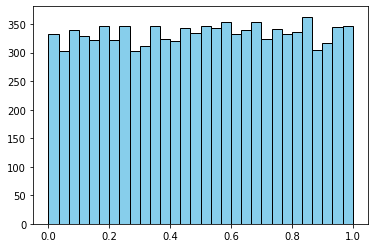

In [11]:
plt.hist(p_values, bins=30, color='skyblue', edgecolor='black')

2. Посчитать, какой процент p values оказался меньше либо равен 0.05

In [12]:
print(f'{len([i for i in p_values if i <= 0.05]) / len(p_values) * 100}%')

4.87%


3. Написать вывод по проведенному А/А-тесту, корректно ли работает наша система сплитования. При выполнении задания важно обосновать и аргументировать ваш вывод.

Вывод по А/А тесту: меньше 4.7% процента наших значений оказались меньше значения 0.05, а также исходя из графика можно заметить что распределения p значения находятся на одном уровне. Наше система сплитования работает корректно